In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
url = 'https://live.staticflickr.com/2059/32901445005_3786b4c49c_b.jpg'

In [3]:
response = urlopen(url)

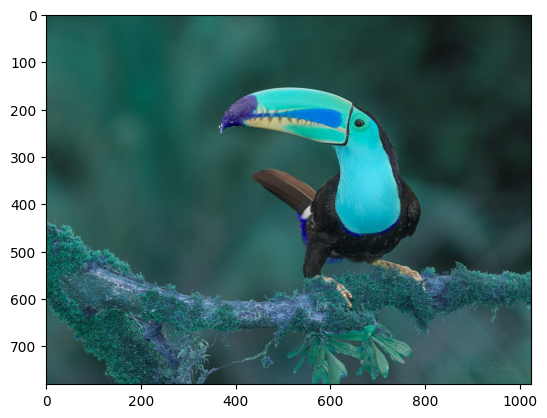

In [4]:
image = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

plt.imshow(img)

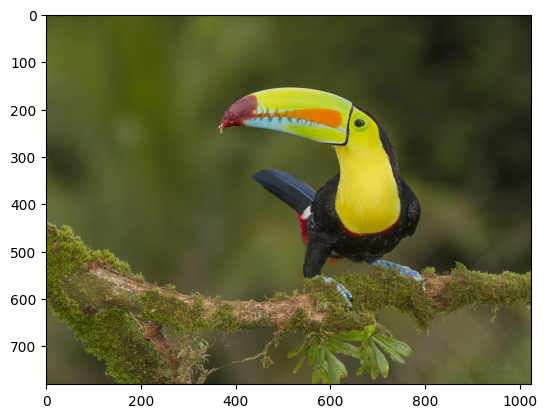

In [5]:
# Converting to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_RGB)

Resizing

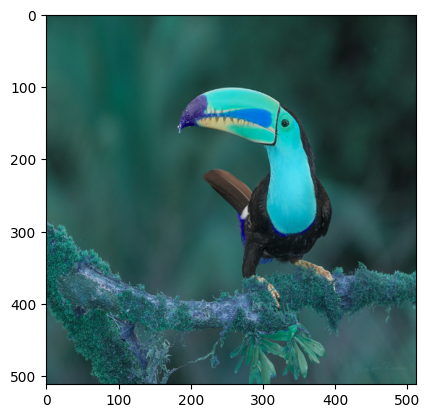

In [6]:
image_squared = cv2.resize(img, (512,512))
plt.imshow(image_squared)

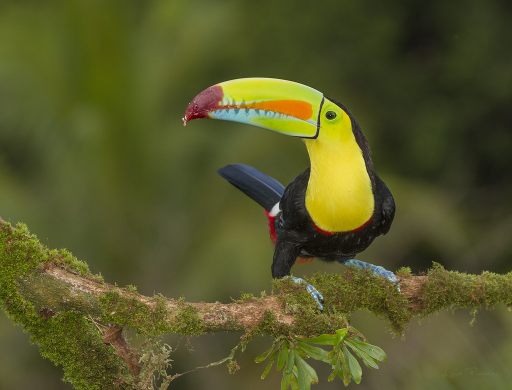

In [7]:
# Fixing colab display issue 
from google.colab.patches import cv2_imshow
image_halved = cv2.resize(img,dsize=None, fx=0.5, fy=0.5)
cv2_imshow(image_halved)

In [8]:
img

array([[[ 30,  83,  74],
        [ 30,  83,  74],
        [ 30,  83,  74],
        ...,
        [ 19,  32,  30],
        [ 21,  34,  32],
        [ 21,  34,  32]],

       [[ 30,  83,  74],
        [ 30,  83,  74],
        [ 31,  84,  75],
        ...,
        [ 19,  32,  30],
        [ 21,  34,  32],
        [ 21,  34,  32]],

       [[ 31,  83,  76],
        [ 31,  83,  76],
        [ 31,  83,  76],
        ...,
        [ 20,  33,  31],
        [ 20,  33,  31],
        [ 21,  34,  32]],

       ...,

       [[ 40,  75,  79],
        [ 41,  76,  80],
        [ 42,  77,  81],
        ...,
        [ 51, 109,  98],
        [ 51, 108,  99],
        [ 51, 108,  99]],

       [[ 41,  76,  80],
        [ 41,  76,  80],
        [ 42,  77,  81],
        ...,
        [ 52, 109, 100],
        [ 51, 108,  99],
        [ 51, 108,  99]],

       [[ 41,  76,  80],
        [ 42,  77,  81],
        [ 42,  77,  81],
        ...,
        [ 54, 110,  99],
        [ 53, 109,  98],
        [ 51, 109,  98]]

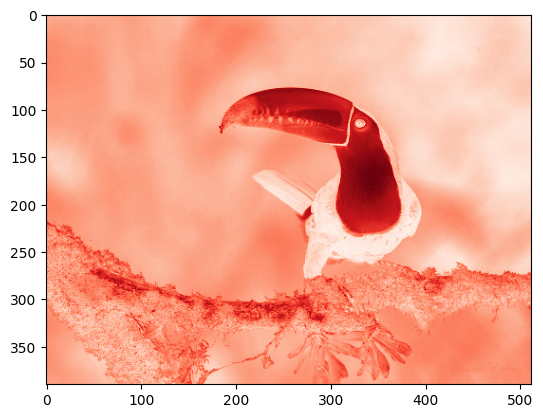

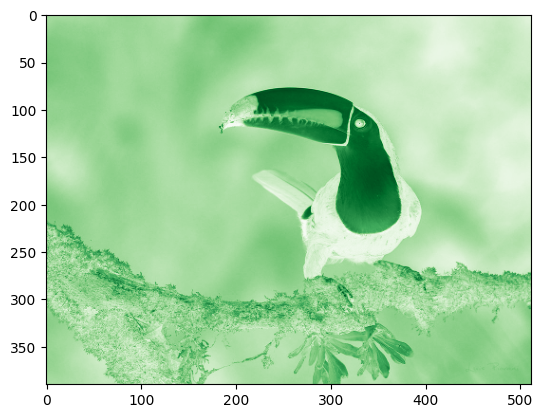

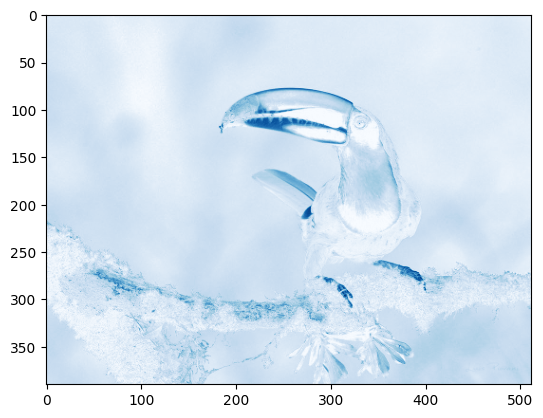

In [9]:
# Seperate channels
import matplotlib.pyplot as plt
image_red = image_halved[:,:,2]
image_blue = image_halved[:,:,0]
image_green = image_halved[:,:,1]
plt.imshow(image_red, cmap='Reds')
plt.show()
plt.imshow(image_green, cmap='Greens')
plt.show()
plt.imshow(image_blue, cmap='Blues')
plt.show()

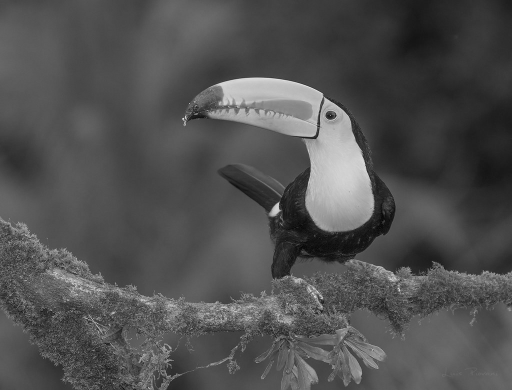

In [10]:
# Greyscale
grey = image_red*0.299 + image_green*0.587 + image_blue*0.114
grey = grey.astype(np.uint8)
cv2_imshow(grey)

In [11]:
grey

array([[ 74,  75,  75, ...,  29,  29,  31],
       [ 74,  74,  74, ...,  30,  30,  31],
       [ 73,  73,  74, ...,  30,  30,  30],
       ...,
       [ 73,  74,  76, ...,  99, 100, 101],
       [ 71,  74,  76, ...,  98,  99,  99],
       [ 73,  74,  76, ...,  99,  99,  98]], dtype=uint8)

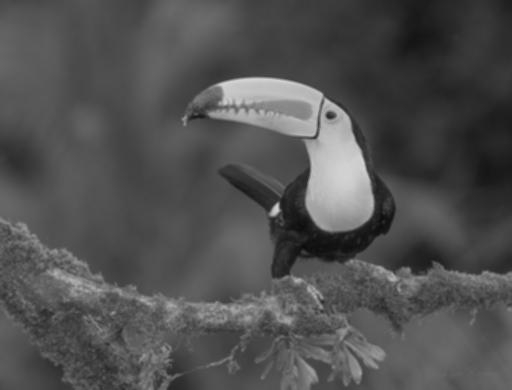

In [12]:
# blur the image using (3,3) kernel
img_blur = cv2.blur(grey, (3,3))
cv2_imshow(img_blur)

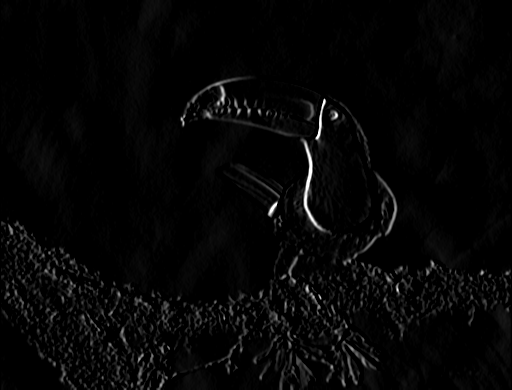

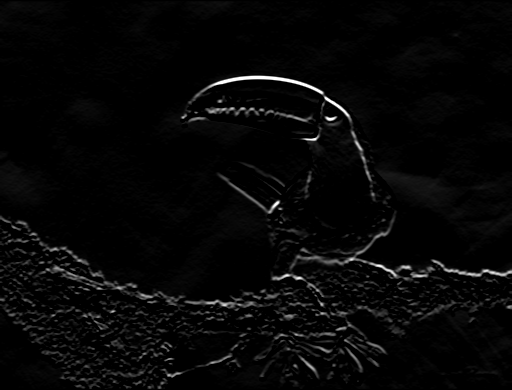

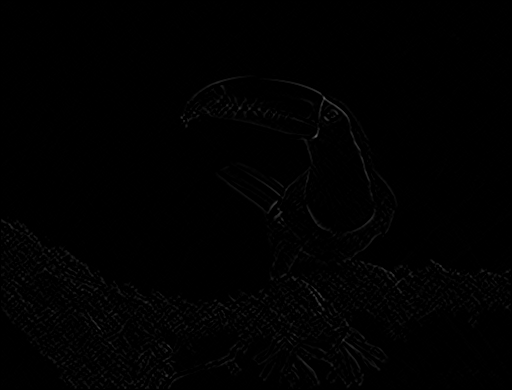

In [13]:
# Sobel Edge Detection
# Use sobel Edge detection on X, Y and XY axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) 
 
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(sobelxy)


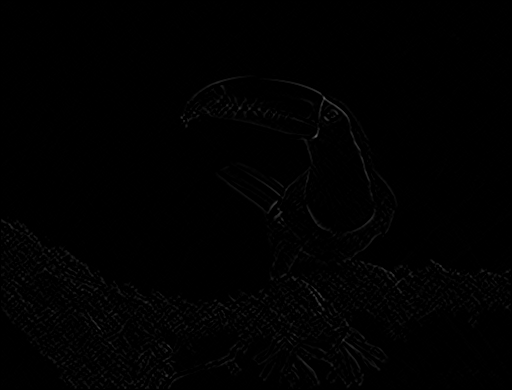

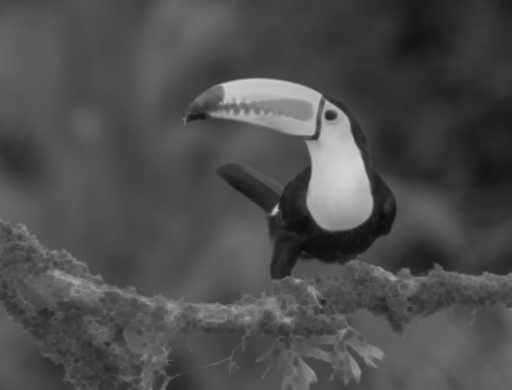

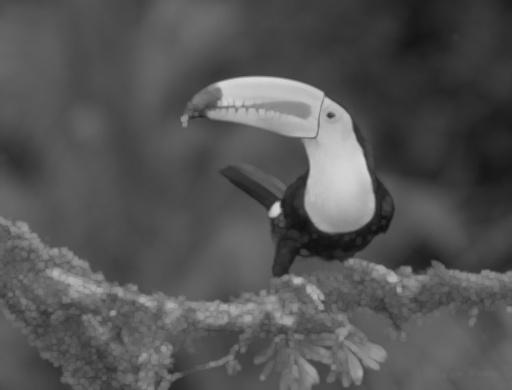

In [14]:
# Apply dilation and erosion to the image (dilation goes first),
kernel = np.ones((3,3))

img_dilation = cv2.dilate(img_blur, kernel)
img_erosion = cv2.erode(img_blur, kernel)
cv2_imshow(sobelxy)
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

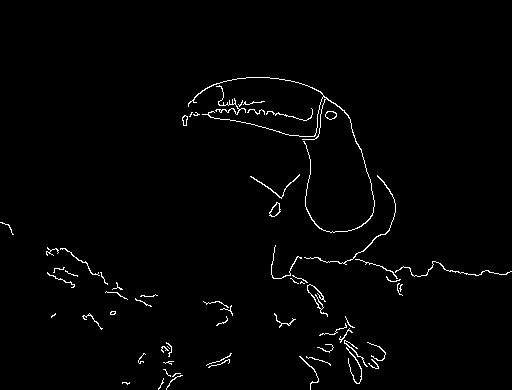

In [15]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
# Display Canny Edge Detection Image
cv2_imshow(edges)

### Task 2 
Find the differences


In [16]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Spot_the_difference.png/640px-Spot_the_difference.png'

In [17]:
response = urlopen(url)

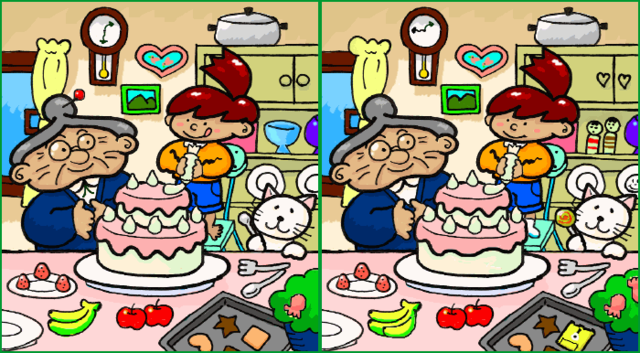

In [18]:
image2 = np.asarray(bytearray(response.read()), dtype="uint8")
img2 = cv2.imdecode(image2, cv2.IMREAD_COLOR)

cv2_imshow(img2)

In [19]:
img2.shape

(353, 640, 3)

In [20]:
left_image = img2[:,:img2.shape[1]//2,:]
right_image = img2[:,img2.shape[1]//2:,:]

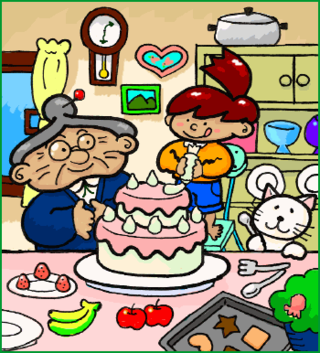

In [21]:
cv2_imshow(left_image)

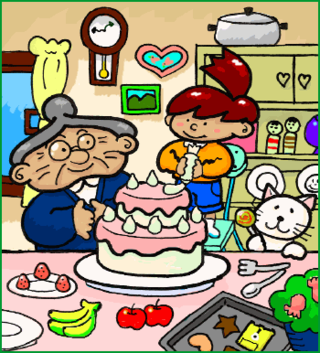

In [22]:
cv2_imshow(right_image)

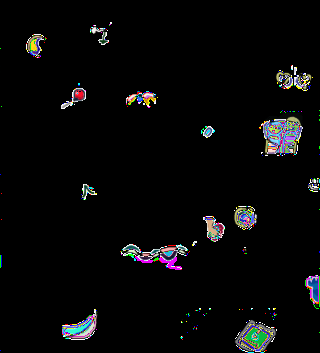

In [23]:
# Differences between images
image_diff = left_image - right_image
cv2_imshow(image_diff)

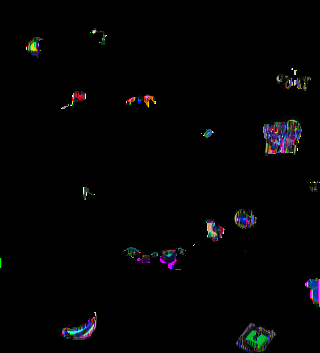

In [24]:
# apply erosion with kernel (3,3)
image_diff_eroded = cv2.erode(image_diff, (3,3))
image_diff_eroded = cv2.erode(image_diff_eroded, (3,3))
image_diff_eroded = cv2.erode(image_diff_eroded, (3,3))
cv2_imshow(image_diff_eroded)

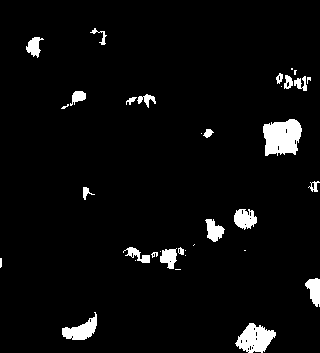

In [25]:
# Masking differences
image_diff_grey = cv2.cvtColor(image_diff_eroded, cv2.COLOR_BGR2GRAY)
_, image_mask = cv2.threshold(image_diff_grey, 10, 255, cv2.THRESH_BINARY) # <--- Changes numbers below to 0 and above to 255
image_mask
cv2_imshow(image_mask)

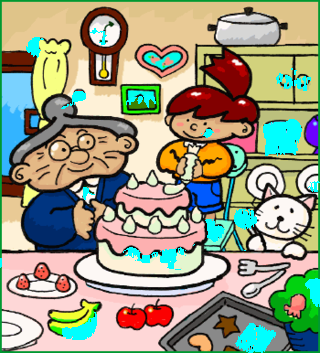

In [26]:
# Draw differences onto picture
contours, hierarchy =  cv2.findContours(image_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(left_image, contours, -1, (255,255,0), thickness=-1)
cv2_imshow(image_with_contours)

### Task 3 
Take the girl on vacation

In [27]:
url3 = 'https://media.istockphoto.com/id/1083764690/video/beautiful-woman-presenter-showing-imaginary-images-from-her-left-and-right-on-a-green-screen.jpg?s=640x640&k=20&c=dB3VgTs-9t28ZfBlcJ3mg1xjE9Lqr9nLETRC6rG_2NU='
url4 = 'https://wpcdn.us-east-1.vip.tn-cloud.net/www.hawaiimagazine.com/content/uploads/2021/04/o/f/2020bob-kauaisnorkel-poipu.jpg'

In [28]:
response = urlopen(url3)

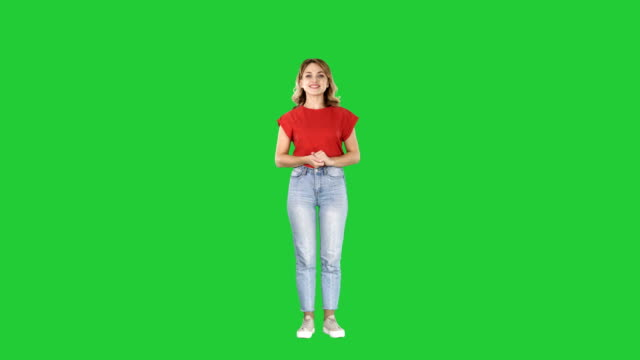

In [29]:
image3 = np.asarray(bytearray(response.read()), dtype="uint8")
img3 = cv2.imdecode(image3, cv2.IMREAD_COLOR)

cv2_imshow(img3)

In [30]:
response = urlopen(url4)

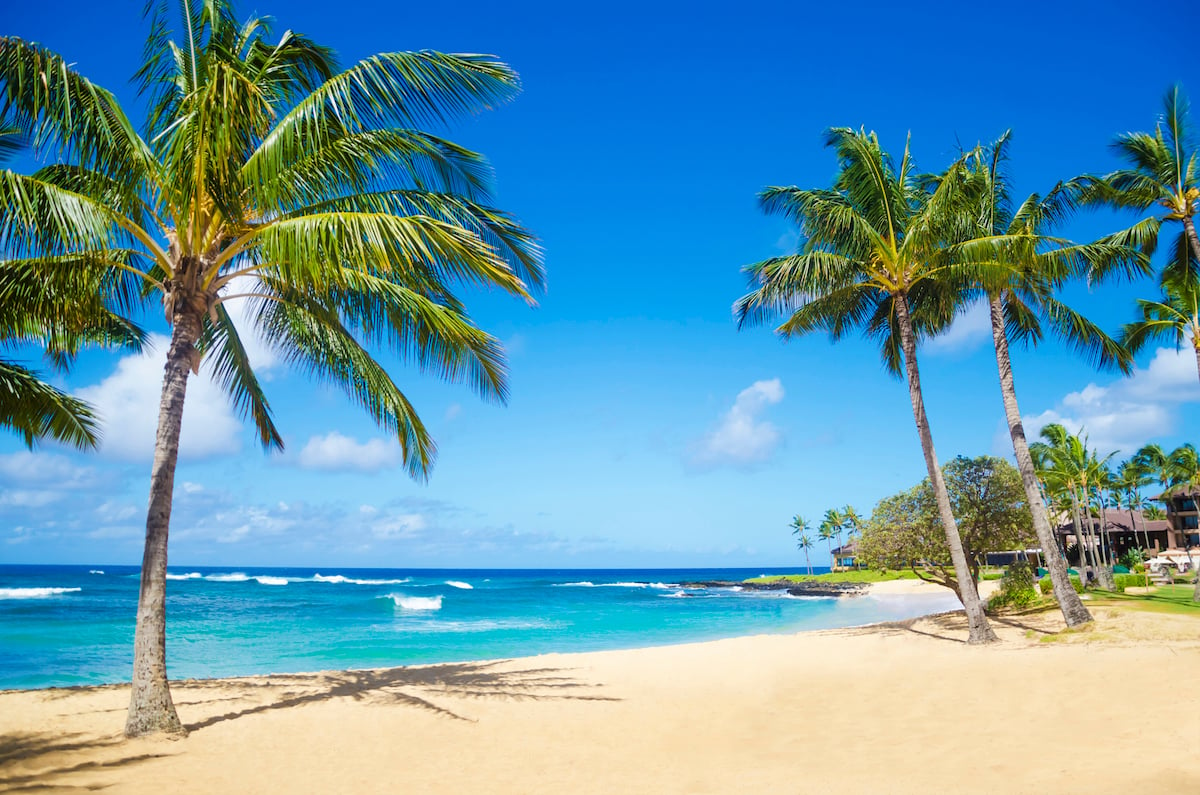

In [31]:
image4 = np.asarray(bytearray(response.read()), dtype="uint8")
img4 = cv2.imdecode(image4, cv2.IMREAD_COLOR)

cv2_imshow(img4)

In [32]:
img3.shape

(360, 640, 3)

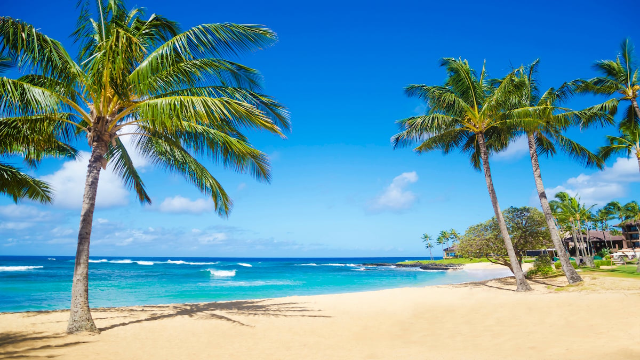

In [33]:
img4_reshaped = cv2.resize(img4, (640,360))
cv2_imshow(img4_reshaped)

In [34]:
img3_hsv= cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

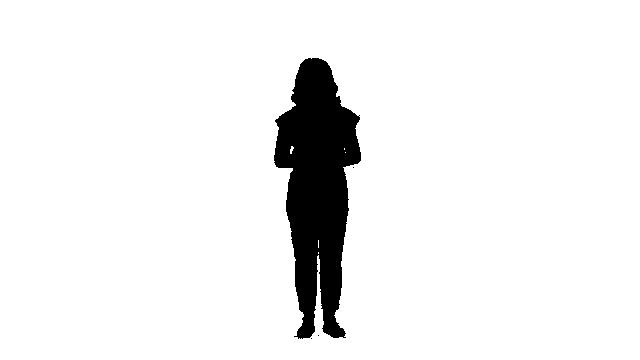

In [35]:
# create a mask using the inRange function
mask = cv2.inRange(img3_hsv,(60,100,170), (65,255,255))
cv2_imshow(mask)

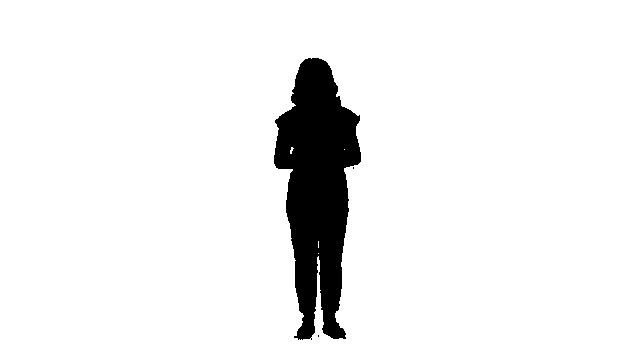

In [36]:
# use erosion with (3,) filter kernel
eroded_mask = cv2.erode(mask, (3,3))
cv2_imshow(eroded_mask)

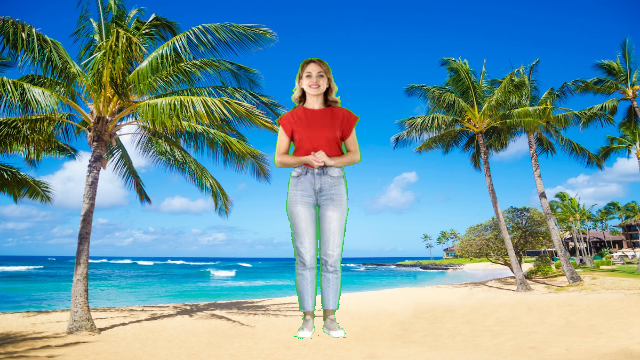

In [37]:
output_img = img4_reshaped.copy()
# Your code
output_img[mask == 0] = img3[mask == 0]
cv2_imshow(output_img)

### Task 4
Histograms

In [38]:
url5= 'https://www.japanrailpassnow.com/wp-content/uploads/2016/02/Cherry-Blossom.jpg'

In [39]:
response = urlopen(url5)

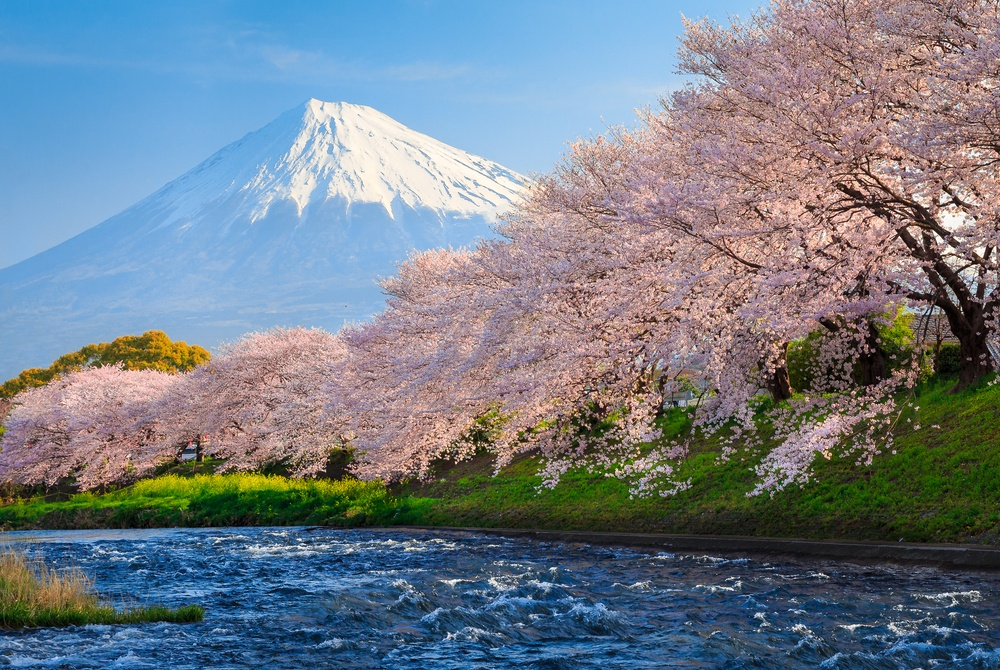

In [40]:
image5 = np.asarray(bytearray(response.read()), dtype="uint8")
img5 = cv2.imdecode(image5, cv2.IMREAD_COLOR)

cv2_imshow(img5)

In [41]:
# flatten the image so it will be a 2D array, (an arrray of pixels)
image_flattened = img5.reshape(-1, 3)

In [42]:
image_flattened

array([[213, 149,  47],
       [213, 149,  47],
       [212, 148,  46],
       ...,
       [ 84,  60,  32],
       [ 96,  66,  37],
       [106,  72,  42]], dtype=uint8)

In [43]:
# use the flattened image to create a DataFrame, set column names to ["b", "g", "r"]
import pandas as pd
df = pd.DataFrame(image_flattened, columns=["b","g", "r"])
df.head()

b    g   r
0  213  149  47
1  213  149  47
2  212  148  46
3  212  148  46
4  213  149  47

In [44]:
df['b'].value_counts()

220    10010
219     9687
221     9365
222     9127
0       8986
       ...  
250       79
251       55
252       54
253       40
254       29
Name: b, Length: 256, dtype: int64

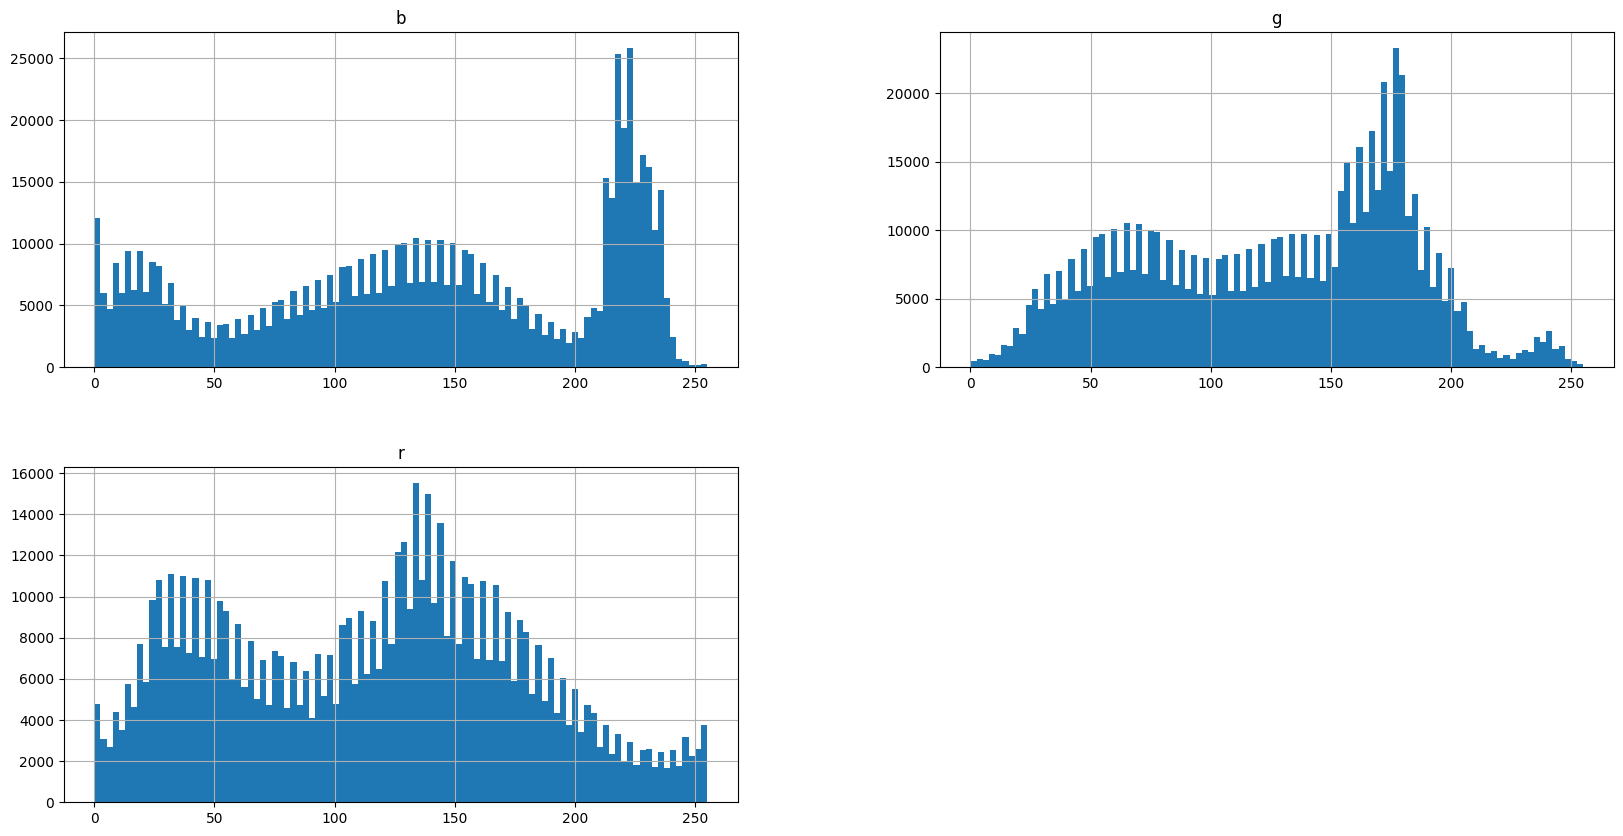

In [45]:
df.hist(bins=100, figsize = (20,10))
plt.show()

In [46]:
# Equalize the image histogram
hsv =  cv2.cvtColor(img5, cv2.COLOR_BGR2HSV)

# split the hsv image using opencv function in H, S, V channels
h, s, v = cv2.split(hsv)

# equalize the saturation and value channels, leave hue as it is
equalized_s = cv2.equalizeHist(s)
equalized_v = cv2.equalizeHist(v)


# combine three channels to restore the 3 channel image using opencv function
equalized_image = cv2.merge([h, equalized_s, equalized_v])

# go back to BGR color palette
equalized_image_bgr = cv2.cvtColor(equalized_image, cv2.COLOR_HSV2BGR)

# display both original image and the equalized image
cv2_imshow(img5)
cv2_imshow(equalized_image_bgr)

Output hidden; open in https://colab.research.google.com to view.

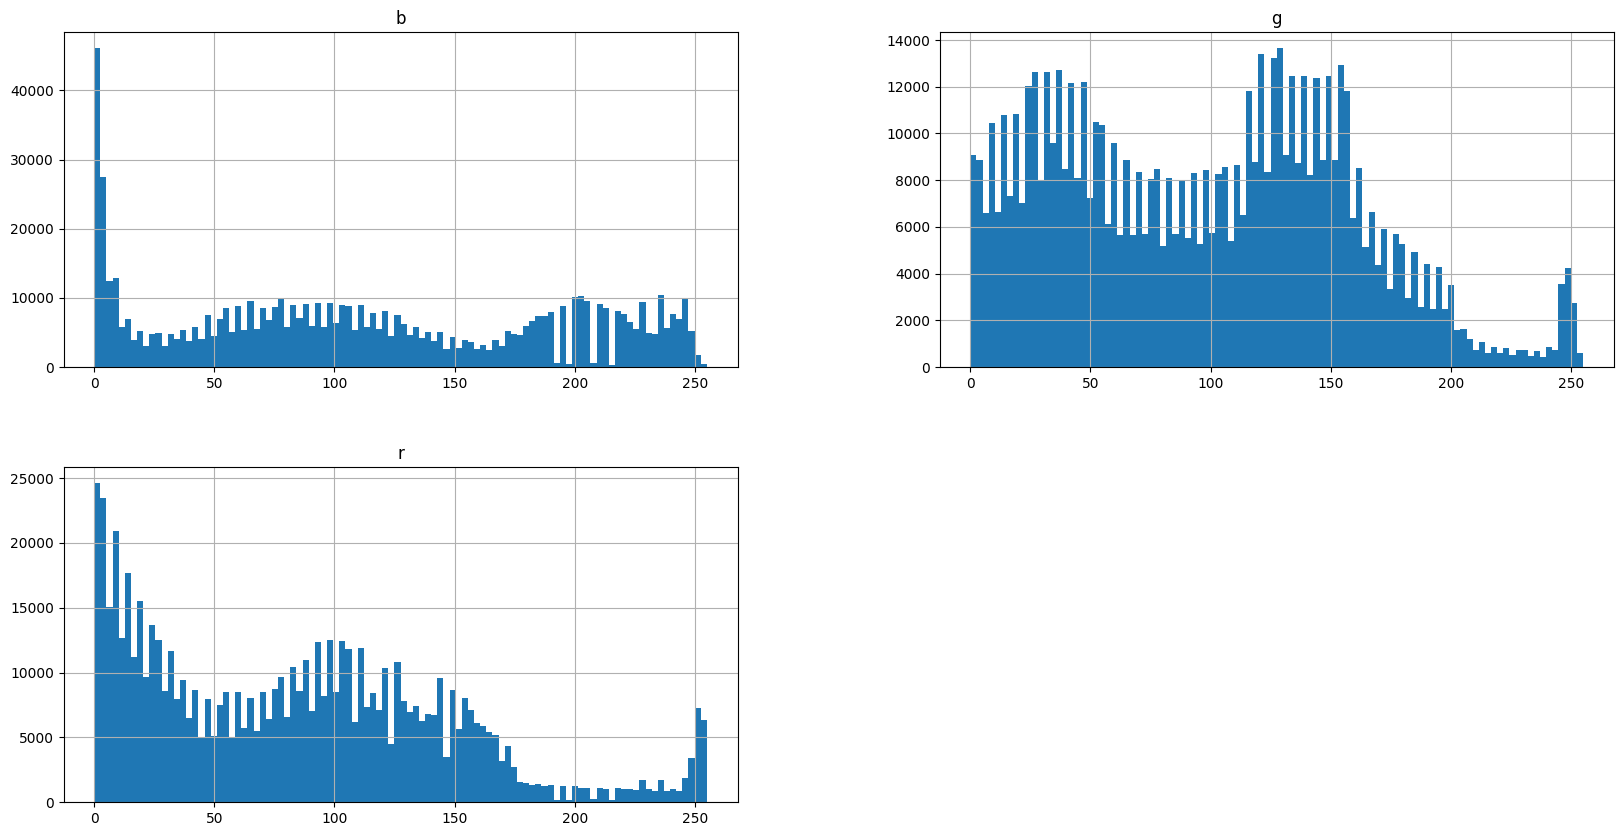

In [47]:
image_flattened = equalized_image_bgr.reshape(-1,3)
df = pd.DataFrame(image_flattened, columns = ["b", "g", "r"])
df.hist(bins=100, figsize=(20,10))
plt.show()